## MACHINE LEARNING DAY - 15 : Random Forest Classification

### What is Random Forest Classification ?
**Random Forest Classification** is a **supervised machine learning algorithm** used for **categorical prediction tasks**. It belongs to the family of **ensemble methods** and is based on building a **“forest” of decision trees** — hence the name "random forest".

---

### 1. **What does it do?**

It predicts **class labels** (e.g., "spam" vs "not spam", "disease" vs "no disease") by combining the outputs of **multiple decision trees**. Rather than relying on a single model, it takes the **majority vote** across many randomly created trees.

---

### 2. **How it works**

#### Step-by-step:

1. **Bootstrap sampling**: Randomly pick multiple **subsets** of the training data (with replacement).
2. For each subset, **build a decision tree**:

   * At each split in the tree, consider only a **random subset of features** (not all features).
3. To make a prediction:

   * Each tree gives a **class label**.
   * The forest takes a **majority vote** among all tree predictions.

This randomness reduces overfitting and increases generalization.

---

### 3. **Why use it?**

Random Forest Classification is powerful because:

* It reduces **variance** (from using many trees)
* It handles **non-linearity** and **feature interactions**
* It's **robust to noisy data**
* It provides **feature importance scores**

---

#### 4. **Example Use Cases**

* Spam email classification
* Disease diagnosis (malignant vs benign)
* Customer churn prediction
* Credit approval

---

#### 5. **Advantages**

* **High accuracy** on many tasks
* **Handles both categorical and numerical features**
* **Reduces overfitting** compared to a single tree
* Can handle **missing values** (with some tuning)
* Can provide **feature importance**

---

#### 6. **Disadvantages**

* **Slower** and **larger** than a single tree
* **Less interpretable** (hard to visualize many trees)
* May not work well with **very sparse or high-dimensional data** unless tuned properly

### Importing the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [6]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')
print(df.sample(10))

     Age  EstimatedSalary  Purchased
171   34           115000          0
44    28            84000          0
14    18            82000          0
51    18            44000          0
292   55            39000          1
257   40            57000          0
165   18            86000          0
339   39           122000          1
353   37            57000          0
174   34            72000          0


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X)
print('\n')
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

### Splitting the dataset into training and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print('\n')
print(X_test)
print('\n')
print(y_train)
print('\n')
print(y_test)
print('\n')

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print('\n')
print(X_test)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

### Training the Random Forest Classification model on Training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 33, random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=33, random_state=0)

### Predicting a new Result 

In [15]:
y_pred_new = classifier.predict(sc.transform([[30, 87000]]))
print('Random Forest Prediction : ', y_pred_new)

Random Forest Prediction :  [0]


### Predicting the test set

In [17]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_pred), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


### Making the confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[56  2]
 [ 3 19]]


0.9375

### Visualising the training set

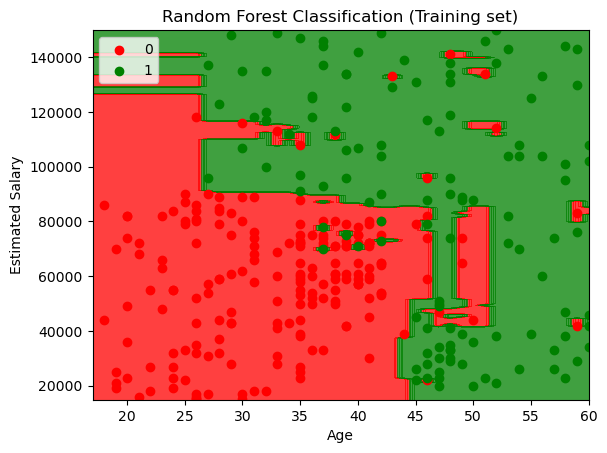

In [21]:
from matplotlib.colors import ListedColormap

# Inverse scaling to plot in original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Choose a reasonable step size
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1.0),
    np.arange(start=X_set[:, 1].min() - 100, stop=X_set[:, 1].max() + 100, step=500.0)
)

# Predict the classifier's output for every point on the grid
grid_points = np.array([X1.ravel(), X2.ravel()]).T
grid_scaled = sc.transform(grid_points)
Z = classifier.predict(grid_scaled).reshape(X1.shape)

# Plotting decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting training points
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the test set 

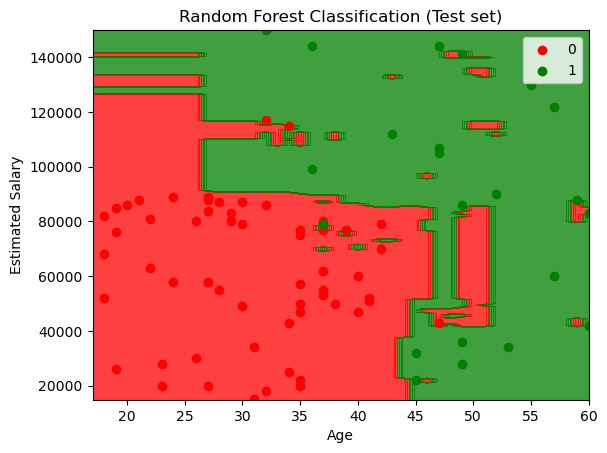

In [23]:
# Inverse transform the test features
X_set, y_set = sc.inverse_transform(X_test), y_test

# Choose optimized step sizes
step_x1 = 1.0
step_x2 = 500.0

# Create a grid over the feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=step_x1),
    np.arange(start=X_set[:, 1].min() - 100, stop=X_set[:, 1].max() + 100, step=step_x2)
)

# Predict over the grid and reshape
grid_points = np.array([X1.ravel(), X2.ravel()]).T
Z = classifier.predict(sc.transform(grid_points)).reshape(X1.shape)

# Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for actual test data
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

# Labels and legend
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()